the python version is 3.7.10


'\nfor item in ([1,(-4,4)], [2,(-4,-4)], [3,(4,-4)]) :\n    r1_square_3 = affinity.rotate(square_3, item[0]*90, (0,0))\n    for i in (0,1,2,3) :\n        r2_square_3 = affinity.rotate(r1_square_3, i*90, item[1])\n        motif_fill(r2_square_3, \'lightsalmon\', 30, 0.3)\n        motif_line(r2_square_3, \'darkviolet\',  30, 1.0)\n#\nplt.savefig("./png/2-3C.png",format="png",dpi=150)\n#\n'

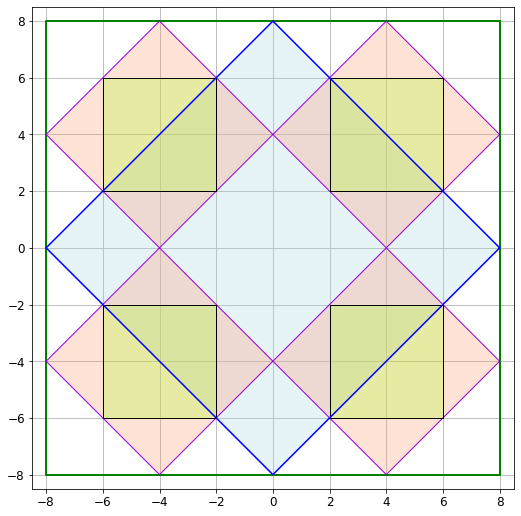

In [10]:
# (home)/Double-Square/
# double-square-2B
# 2021-10-22
#
# python 3.8.10
# run on replit.com
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(17, 17)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-8,-6,-4,-2,0,2,4,6,8]
yvalues = [-8,-6,-4,-2,0,2,4,6,8]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=12)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/2-0.png",format="png",dpi=150)
#
p1A = ( 8, 8)
p1B = (-8, 8)
p1C = (-8,-8)
p1D = ( 8,-8)
square_1_xy = [p1A, p1B, p1C, p1D, p1A]
square_1    = LineString(square_1_xy)
motif_line(square_1, 'green', 10, 2.0)
#
plt.savefig("./png/2-1.png",format="png",dpi=150)
#
p2A = ( 8, 0)
p2B = ( 0, 8)
p2C = (-8, 0)
p2D = ( 0,-8)
square_2_xy = [p2A, p2B, p2C, p2D, p2A]
square_2    = LineString(square_2_xy)
motif_fill(square_2, 'lightblue', 20, 0.3)
motif_line(square_2, 'blue', 40, 1.5)
#
plt.savefig("./png/2-2.png",format="png",dpi=150)
#
p3A = ( 8, 4)
p3B = ( 4, 8)
p3C = ( 0, 4)
p3D = ( 4, 0)
square_3_xy = [p3A, p3B, p3C, p3D, p3A]
square_3    = LineString(square_3_xy)
motif_fill(square_3, 'lightsalmon', 30, 0.3)
motif_line(square_3, 'darkviolet',  30, 1.0)
#
plt.savefig("./png/2-3A.png",format="png",dpi=150)
#
for i in (1,2,3) :
    r_square_3 = affinity.rotate(square_3, i*90, (0,0))
    motif_fill(r_square_3, 'lightsalmon', 30, 0.3)
    motif_line(r_square_3, 'darkviolet',  30, 1.0)
#
plt.savefig("./png/2-3B.png",format="png",dpi=150)
#
p4A = ( 6, 6)
p4B = ( 2, 6)
p4C = ( 2, 2)
p4D = ( 6, 2)
square_4_xy = [p4A, p4B, p4C, p4D, p4A]
square_4    = LineString(square_4_xy)
motif_fill(square_4, 'greenyellow', 30, 0.3)
motif_line(square_4, 'black',  30, 1.0)
#
plt.savefig("./png/2-4A.png",format="png",dpi=150)
#
for i in (1,2,3) :
    r_square_4 = affinity.rotate(square_4, i*90, (0,0))
    motif_fill(r_square_4, 'greenyellow', 30, 0.3)
    motif_line(r_square_4, 'black',  30, 1.0)
#
plt.savefig("./png/2-4B.png",format="png",dpi=150)
#